# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
Malaria is a contagious disease that affects a large proportion of the population.  Hundreds of thousands are killed annually from malaria, most of these deaths are children less than 5 years old.  It is important to diagnose malaria early because the parasites that cause malaria can stay alive in the body for up to 1 year.  Malaria can be identified by imaging red blood cells.

**The objectives:** What is the intended goal?<br>
The goal is to build an efficient model that can identify damaged/parasitized red blood cells.  Model will be trained with images of healthy red blood cells and damaged red blood cells.  Model needs to accurately discern if the red blood cell is damaged or healthy.

**The key questions:** What are the key questions that need to be answered?<br>

The key question is: Which model will most accurately and efficiently identify damaged/parasitized red blood cells?

**The problem formulation:** What is it that we are trying to solve using data science?

Data science will be used to develop a model that can identify damaged/parasitized red blood cells.  A model will be trained on images of healthy red blood cells and damaged/parasitized red blood cells, so that it can learn distinct patterns for each group.  Model will be able to accurately identify if unseen images of red blood cells are damaged/parasitized or healthy.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### <b>Loading libraries</b>

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from google.colab.patches import cv2_imshow
import zipfile
import cv2
import warnings
warnings.filterwarnings('ignore')
import random



### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [3]:
# zip1= zip file with training and test data
zip1= "/content/drive/MyDrive/MIT/Capstone_project/cell_images.zip"

In [4]:
# extract images from zip file
with zipfile.ZipFile(zip1, 'r') as zip2:
  zip2.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# resize x_train images and save to list
# create labels (y_train)

train_dir= "/content/cell_images/train"                 # filepath to training folder
folders= ['parasitized', 'uninfected']                  # folders within training folder

x_train= []                                             # list to hold training images
y_train= []                                             # list to hold training labels

# for loop to store images in x_train and labels in y_train
for i in folders:
  newpath= Path(train_dir) / i                          # combined filepath of training directory and folder: parasitized or uninfected
  files= newpath.glob('*')                              # get all files within filepath
  j= 0
  for j in files:
    img1= cv2.imread(str(j))                            # read in image from folder
    img2= cv2.resize(img1, (64, 64))                    # resize image to 64 x 64
    x_train.append(img2)                                # add resized image to list

    if i == folders[0]:                                 # if parasitized y_train label= 0
      y_train.append(0)
    else:                                               # if uninfected y_train label= 1
      y_train.append(1)

In [6]:
# convert y_train from list to series
y_train= pd.Series(y_train, name= 'Labels')


# convert x_train to array
x_train= np.array(x_train)


In [7]:
# resize x_test images and save to list
# create labels (y_test)

test_dir= "/content/cell_images/test"                 # filepath to test folder


x_test= []                                             # list to hold test images
y_test= []                                             # list to hold test labels

# for loop to store images in x_test and labels in y_test
i= 0
for i in folders:
  newpath2= Path(test_dir) / i                          # combined filepath of test directory and folder: parasitized or uninfected
  files2= newpath2.glob('*')                              # get all files within filepath
  j= 0
  for j in files2:
    img3= cv2.imread(str(j))                            # read in image from folder
    img4= cv2.resize(img3, (64, 64))                  # resize image to 64 x 64 (matches training image size)
    x_test.append(img4)                                # add resized image to list

    if i == folders[0]:                                 # if parasitized y_test label= 0
      y_test.append(0)
    else:                                               # if uninfected y_test label= 1
      y_test.append(1)

In [8]:
# convert y_test from list to series
y_test= pd.Series(y_test, name= 'Labels')


# convert x_test to array
x_test= np.array(x_test)

###<b> Check the shape of train and test images

In [9]:
# check shape of x_train
print('Shape of x_train is: {}'.format(x_train.shape))

Shape of x_train is: (24958, 64, 64, 3)


In [10]:
# check shape of x_test
print('Shape of x_test is: {}'.format(x_test.shape))

Shape of x_test is: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [11]:
# check shape of y_train
print('Shape of y_train is: {}'.format(y_train.shape))

Shape of y_train is: (24958,)


In [12]:
# check shape of y_test
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of y_test is: (2600,)


####<b> Observations and insights:####
Labels were created for training and test images.  x_train and x_test images were resized to 128 x 128 x 3 and converted to array. 128 x 128 was chosen image size because it was the closest power of 2 to the median image size of the original training data.  



### <b>Check the minimum and maximum range of pixel values for train and test images

In [13]:
# find minimum pixel value, maximum pixel value and pixel value range for training images
min_train= np.min(x_train)
max_train= np.max(x_train)
print("For x_train the minimum pixel value is {}".format(min_train))
print("For x_train the maximum pixel value is {}".format(max_train))
print("For x_train the pixel value range is {}".format(max_train - min_train))


For x_train the minimum pixel value is 0
For x_train the maximum pixel value is 255
For x_train the pixel value range is 255


In [14]:
# find minimum pixel value, maximum pixel value and pixel value range for test images
min_test= np.min(x_test)
max_test= np.max(x_test)
print("For x_test the minimum pixel value is {}".format(min_test))
print("For x_test the maximum pixel value is {}".format(max_test))
print("For x_test the pixel value range is {}".format(max_test - min_test))

For x_test the minimum pixel value is 0
For x_test the maximum pixel value is 255
For x_test the pixel value range is 255


####<b> Observations and insights: For both testing and training we see that the maximum pixel value= 255 and minimum pixel value= 0.  To normalize can divide by 255.



###<b> Count the number of values in both uninfected and parasitized

In [15]:
# value counts for training data, 0= parasitized and 1= uninfected
y_train.value_counts()

,count
Labels,
0,12582
1,12376


There are 12,582 images of parasitized red blood cells in training image set.  There are 12,376 images of healthy red blood cells in the training image set.  Training image set is balanced.

In [16]:
# values for test data, 0= parasitized and 1= uninfected
y_test.value_counts()

,count
Labels,
0,1300
1,1300


There are 1,300 images of parasitized red blood cells in test image set.  There are 1,300 images of healthy red blood cells in the test image set.  Test image set is balanced.

###<b>Normalize the images

In [17]:
# normalize the training set
x_train= x_train/255

In [18]:
# normalize the training set
x_test= x_test/255

####<b> Observations and insights: Based on value counts of labels the training data looks balanced.  x_train and x_test are normalized (divided by max value).

###<b> Plot to check if the data is balanced

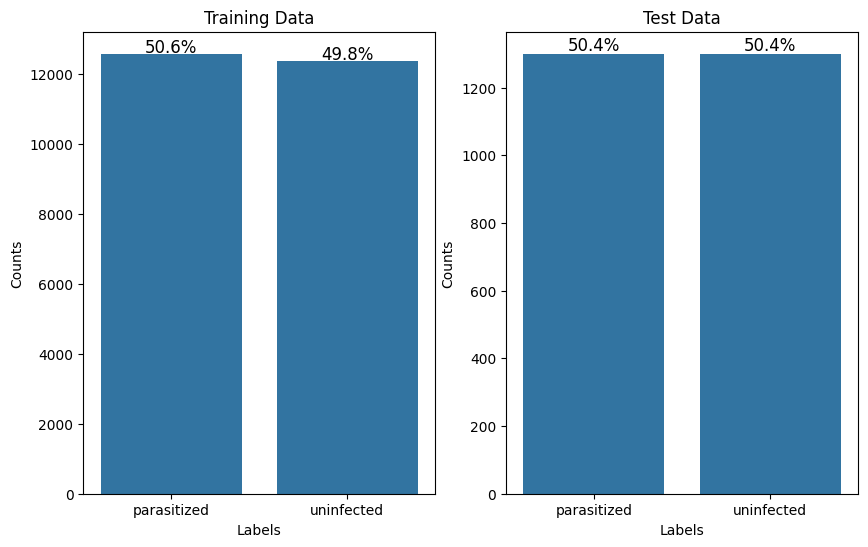

In [19]:
# plot the value_counts for training and test to see if data is balanced
names1= ['parasitized', 'uninfected']

fig1, (ax1, ax2)= plt.subplots(1, 2, figsize= (10, 6))                                 # setup the subplots
ax1.set_title('Training Data')                                                         # title for training data barplot
ax1.set_ylabel('Counts')                                                               # y label for graph
ax1.set_xticklabels(names1)                                                            # new x label for bars
sns.countplot(x= y_train, ax= ax1)
# for loop to add labels to top of bars
for p in ax1.patches:
  y1= p.get_height() + 50                                                              # get bar height
  x1= p.get_x() + (p.get_width()/2) -0.15                                               # find middle of bar
  total1= y_train.shape[0]                                                             # find total number of training labels
  label= str(round(100 * (y1/total1), 1)) + '%'                                        # format label
  ax1.annotate(label, (x1, y1), size= 12)                                              # annotate the graph with percent

ax2.set_title('Test Data')                                                             # title for the test data
ax2.set_ylabel('Counts')                                                               # y label for the test data plot
ax2.set_xticklabels(names1)                                                            # x label for the bars
sns.countplot(x= y_test, ax= ax2)
# for loop to add labels to top of bars
for p in ax2.patches:
  y2= p.get_height() + 10                                                              # get bar height
  x2= p.get_x() + (p.get_width()/2) -0.15                                               # find middle of bar
  total2= y_test.shape[0]                                                              # find total number of training labels
  label2= str(round(100 * (y2/total2), 1)) + '%'                                       # format label
  ax2.annotate(label2, (x2, y2), size= 12)                                             # annotate the graph with percent


####<b> Observations and insights: Both the training and the test datasets are balanced.

### <b>Data Exploration</b>
Let's visualize the images from the train data

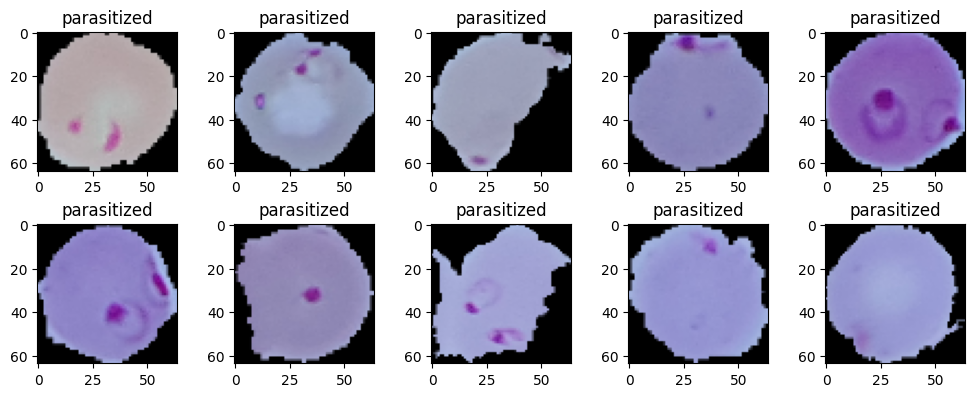

In [20]:
# look at the parasitized images
randomlist1= np.random.randint(0, 12500, size= 10)                             # make random list, images to plot for parasitized

count1= 0                                                                      # counter
# make figure with 10 images
fig3, ax3= plt.subplots(2, 5, figsize= (10, 4))
fig3.tight_layout()
for i in range(2):
  for j in range(5):
    ax3[i, j].imshow(x_train[randomlist1[count1]])                             # plot the images
    if y_train[randomlist1[count1]] == 0:                                      # check the label
      title3= 'parasitized'
    else:
      title3= 'uninfected'
    count1= count1 + 1                                                         # update the counter
    ax3[i, j].set_title(title3)                                                # update title with label


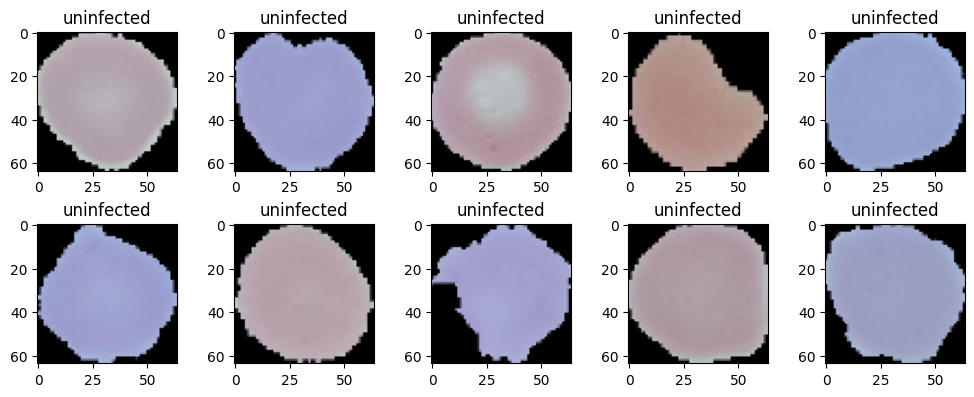

In [21]:
# look at the uninfected images
randomlist2= np.random.randint(13000, 24950, size= 10)                             # make random list, images to plot for healthy cells

count2= 0                                                                      # counter
# make figure with 10 images
fig4, ax4= plt.subplots(2, 5, figsize= (10, 4))
fig4.tight_layout()
for i in range(2):
  for j in range(5):
    ax4[i, j].imshow(x_train[randomlist2[count2]])                             # plot the images
    if y_train[randomlist2[count2]] == 0:                                      # check the label
      title4= 'parasitized'
    else:
      title4= 'uninfected'
    count2= count2 + 1                                                         # update the counter
    ax4[i, j].set_title(title4)                                                # update title with label

####<b> Observations and insights: The parasitized red blood cells have at least 1 dark spot.  Dark spots appear red or purple.  Uninfected red blood cells are more uniform in color.  The images dont have consistent lighting:  some of the red blood cells are pale while others are shades of purple.  The inconsistent lighting is seen in both the parasitized images and the uninfected images.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

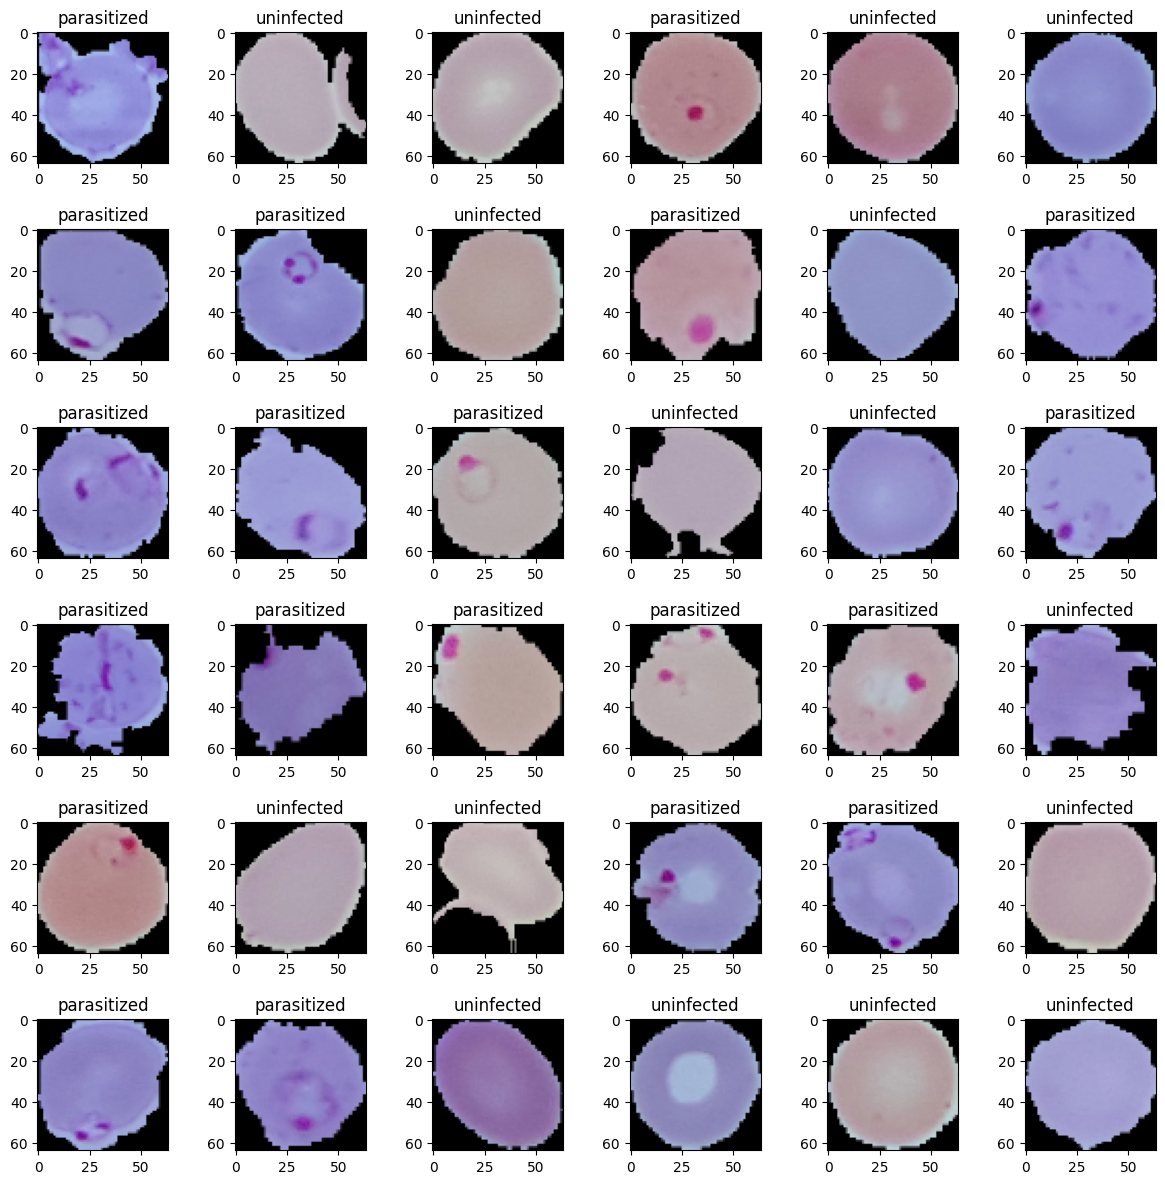

In [22]:
# look at 36 images
randomlist3= np.random.randint(0, 24950, size= 36)                             # make random list of images

count3= 0                                                                      # counter
# make figure with 36 images
fig5, ax5= plt.subplots(6, 6, figsize= (12, 12))
fig5.tight_layout()
for i in range(6):
  for j in range(6):
    ax5[i, j].imshow(x_train[randomlist3[count3]])                             # plot the images
    if y_train[randomlist3[count3]] == 0:                                      # check the label
      title5= 'parasitized'
    else:
      title5= 'uninfected'
    count3= count3 + 1                                                         # update the counter
    ax5[i, j].set_title(title5)                                                # update title with label

####<b>Observations and insights:  The parasitized red blood cells all have at least 1 dark spot.  There are inconsistencies in the lighting.  Some red blood cells appear pale while others are purple.  Both types of red blood cells:parasitized and uninfected have inconsistent lighting.

###<b> Plotting the mean images for parasitized and uninfected

In [23]:
# find all of the parasitized training
y_train_infect= y_train[y_train == 0]
y_train_infect_idx= y_train_infect.index                        # get index for all infected/parasitized training images

# get the images from x_train
x_train_infect= x_train[y_train_infect_idx]                     # use index from y_train to get correct x_train images



In [24]:
# find all of the uninfected training
y_train_heal= y_train[y_train == 1]
y_train_heal_idx= y_train_heal.index                        # get index for all uninfected training images

# get the images from x_train
x_train_heal= x_train[y_train_heal_idx]                     # use index from y_train to get correct x_train images

<b> Mean image for parasitized

Text(0.5, 1.0, 'Parasitized_avg_image')

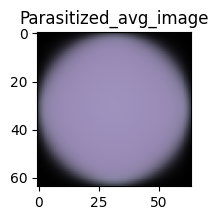

In [25]:
# find the average image for infected
avg_infect= np.average(x_train_infect, axis= 0)            # take average of all x_train images in parasitized

fig6= plt.figure(figsize= (2, 2))                          # plot average image
plt.imshow(avg_infect)
plt.title('Parasitized_avg_image')


<b> Mean image for uninfected

Text(0.5, 1.0, 'Uninfected_avg_image')

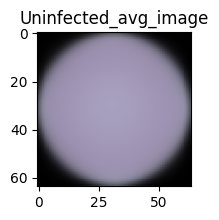

In [26]:
# find the average image for healthy red blood cells
avg_heal= np.average(x_train_heal, axis= 0)                                          # take average image for uninfected

fig7= plt.figure(figsize= (2, 2))                                                # plot average image for uninfected
plt.imshow(avg_heal)
plt.title('Uninfected_avg_image')


####<b> Observations and insights: The average images for parasitized and uninfected look the same.  Both look like purple sphere.  Seems like averaging removed useful features: dark spot in the parasitized images.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [27]:
# convert from BGR to HSV
hsv_train= []                                                                    # empty list to store images
for i in x_train:                                                                 # for loop to convert images
  bgr1= i*255                                                                     # make images scale from 0 to 255
  bgr2= bgr1.astype(np.uint8)                                                     # convert images to uint8 so cv2 will accept
  hsv1= cv2.cvtColor(bgr2, cv2.COLOR_BGR2HSV)                                        # change from bgr to hsv
  hsv_train.append(hsv1)                                                          # add hsv images to list

In [28]:
# convert from list to array
hsv_train= np.array(hsv_train)

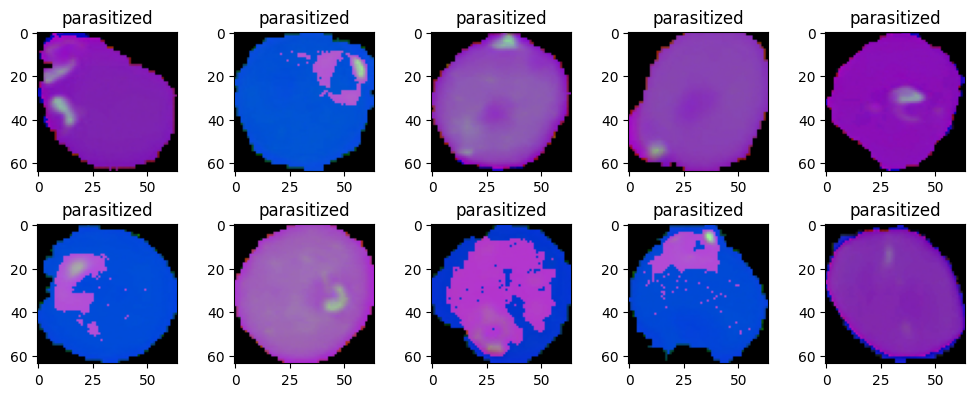

In [29]:
# look at the parasitized hsv images
randomlist1= np.random.randint(0, 12500, size= 10)                               # make random list, images to plot for parasitized

count1= 0                                                                        # counter
# make figure with 10 images
fig10, ax10= plt.subplots(2, 5, figsize= (10, 4))                                # define figure and subplots
fig10.tight_layout()                                                             # use tight layout
i= 0
for i in range(2):                                                               # loop over rows
  j= 0
  for j in range(5):                                                             # loop over columns
    ax10[i, j].imshow(hsv_train[randomlist1[count1]])                             # plot the images
    if y_train[randomlist1[count1]] == 0:                                         # check the label
      title10= 'parasitized'
    else:
      title10= 'uninfected'
    count1= count1 + 1                                                           # update the counter
    ax10[i, j].set_title(title10)                                                # update title with label


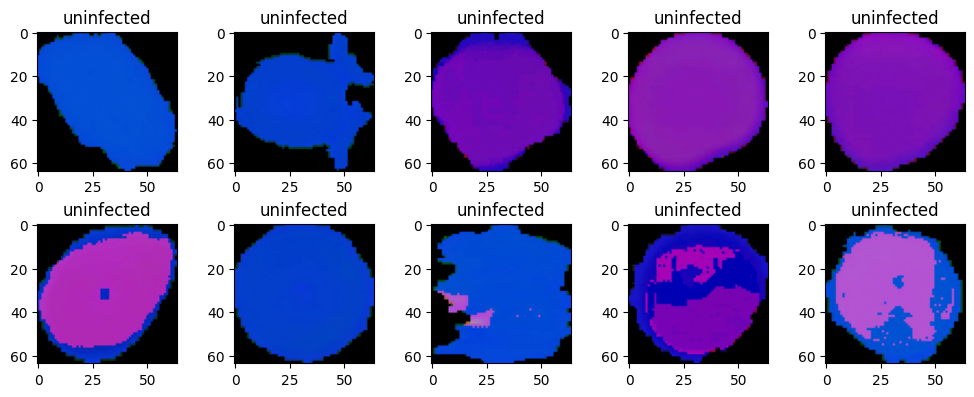

In [30]:
# look at the parasitized hsv images
randomlist2= np.random.randint(13000, 24950, size= 10)                           # make random list, images to plot for parasitized

count1= 0                                                                        # counter
# make figure with 10 images
fig11, ax11= plt.subplots(2, 5, figsize= (10, 4))                                #define subplots in figure
fig11.tight_layout()
i= 0
for i in range(2):                                                               # loop over rows
  j= 0
  for j in range(5):                                                             # loop over columns
    ax11[i, j].imshow(hsv_train[randomlist2[count1]])                             # plot the images
    if y_train[randomlist2[count1]] == 0:                                        # check the label
      title11= 'parasitized'
    else:
      title11= 'uninfected'
    count1= count1 + 1                                                           # update the counter
    ax11[i, j].set_title(title11)                                                # update title with label


###<b> Converting the test data

In [31]:
# convert from BGR to HSV
hsv_test= []                                                                      # empty list to store images
for i in x_test:                                                                  # for loop to convert images
  bgr10= i*255                                                                    # make images scale from 0 to 255
  bgr20= bgr10.astype(np.uint8)                                                   # convert images to uint8 so cv2 will accept
  hsv10= cv2.cvtColor(bgr20, cv2.COLOR_BGR2HSV)                                   # change from bgr to hsv
  hsv_test.append(hsv10)                                                          # add hsv images to list

In [32]:
# convert from list to array
hsv_test= np.array(hsv_test)

####<b>Observations and insights: The HSV images for uninfected cells are predominantly blue, pink or purple.  The HSV images for parasitized cells have green/yellow spots.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [33]:
# apply gaussian blur to training images
blur_train= []                                                                  # empty list

i= 0
for i in hsv_train:                                                             # for loop to make each training image blurred
  img1= cv2.cvtColor(i, cv2.COLOR_HSV2BGR)                                      # convert hsv to bgr
  blur1= cv2.GaussianBlur(img1, (5, 5), 0)                                       # apply gaussian blur to image
  blur_train.append(blur1)                                                      # append blurred image to list

blur_train= np.array(blur_train)

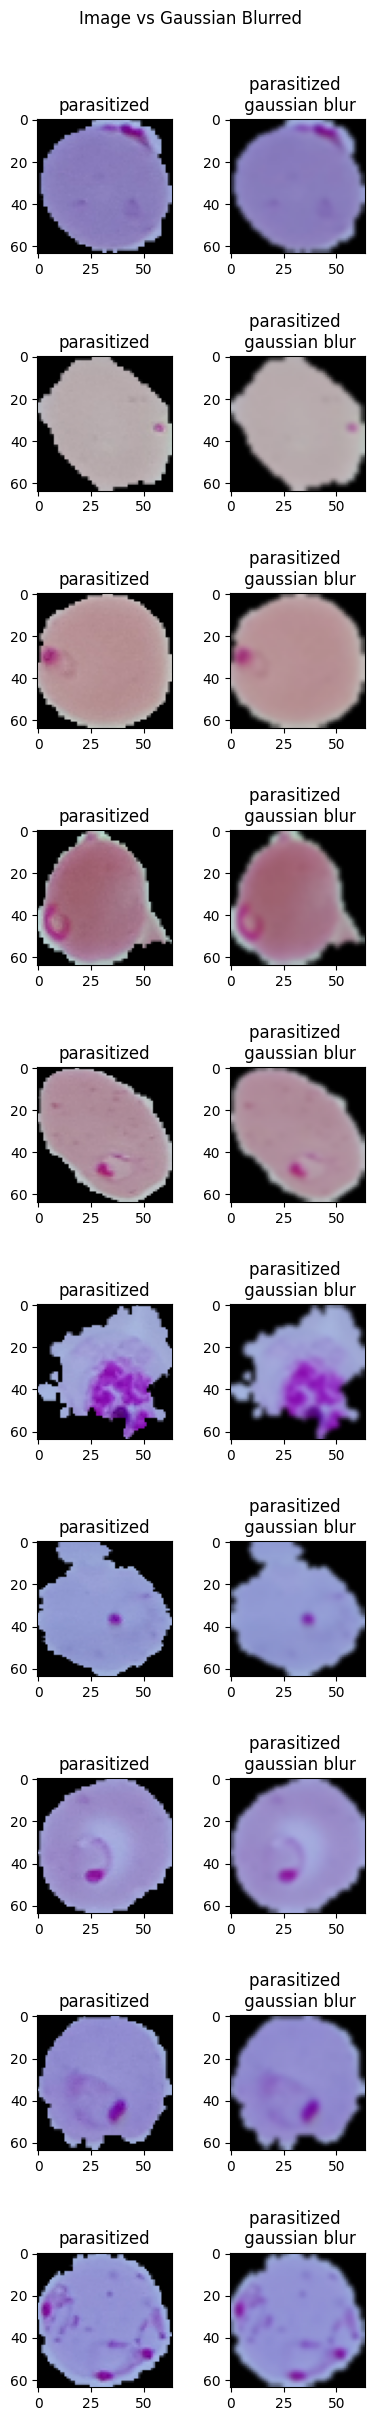

In [34]:
# look at the parasitized images vs blurred images
randomlist1= np.random.randint(0, 12500, size= 10)                               # make random list, images to plot for parasitized

count1= 0                                                                        # counter
# make figure with 20 images
fig20, ax20= plt.subplots(10, 2, figsize= (4, 25))                               # make figure with 20 subplots
fig20.tight_layout(h_pad= 0.5)                                                   # add extra padding between subplots
fig20.suptitle('Image vs Gaussian Blurred')                                      # add title to figure
fig20.subplots_adjust(top= 0.95)
i= 0
for i in range(10):
  j= 0
  for j in range(2):
    if j == 0:
      ax20[i, j].imshow(x_train[randomlist1[count1]])                             # plot the images
      if y_train[randomlist1[count1]] == 0:                                       # check the label
        title20= 'parasitized'
      else:
        title20= 'uninfected'
      ax20[i, j].set_title(title20)                                                # update title with label
    else:
      ax20[i, j].imshow(blur_train[randomlist1[count1]])                            # plot the gaussian blurred images
      if y_train[randomlist1[count1]] == 0:                                         # check the label
        title20= 'parasitized \n gaussian blur'
      else:
        title20= 'uninfected \n gaussian blur'
      count1= count1 + 1                                                           # update the counter
      ax20[i, j].set_title(title20)                                                # update title with label


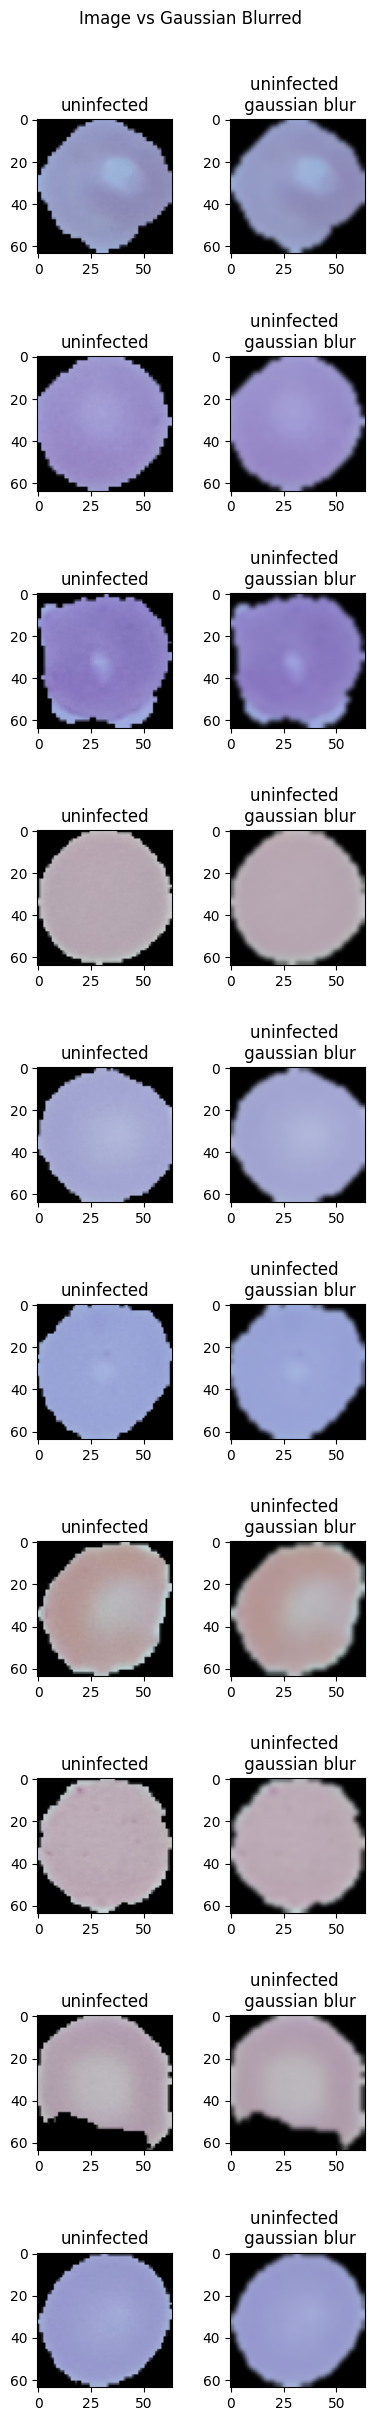

In [35]:
# look at the uninfected images vs blurred images
randomlist2= np.random.randint(13000, 24950, size= 10)                           # make random list, images to plot for parasitized

count1= 0                                                                        # counter
# make figure with 20 images
fig21, ax21= plt.subplots(10, 2, figsize= (4, 25))                               # make figure with 20 subplots
fig21.tight_layout(h_pad= 0.5)                                                   # add extra padding between subplots
fig21.suptitle('Image vs Gaussian Blurred')                                      # add title to figure
fig21.subplots_adjust(top= 0.95)
i= 0
for i in range(10):                                                              # loop over rows
  j= 0
  for j in range(2):                                                             # loop over columns
    if j == 0:
      ax21[i, j].imshow(x_train[randomlist2[count1]])                             # plot the images
      if y_train[randomlist2[count1]] == 0:                                         # check the label
        title21= 'parasitized'
      else:
        title21= 'uninfected'
      ax21[i, j].set_title(title21)                                                # update title with label
    else:
      ax21[i, j].imshow(blur_train[randomlist2[count1]])                            # plot the gaussian blurred images
      if y_train[randomlist2[count1]] == 0:                                         # check the label
        title21= 'parasitized \n gaussian blur'
      else:
        title21= 'uninfected \n gaussian blur'
      count1= count1 + 1                                                           # update the counter
      ax21[i, j].set_title(title21)                                                # update title with label

###<b> Gaussian Blurring on test data

In [36]:
# apply gaussian blur to test images
blur_test= []                                                                    # empty list

i= 0
for i in hsv_test:                                                               # for loop to make each training image blurred
  img2= cv2.cvtColor(i, cv2.COLOR_HSV2BGR)                                       # convert hsv to bgr
  blur2= cv2.GaussianBlur(img2, (5, 5), 0)                                       # apply gaussian blur to image
  blur_test.append(blur2)                                                        # append blurred image to list

blur_test= np.array(blur_test)                                                   # convert to np array

####<b>Observations and insights: The training and test images were gaussian blurred using kernel size= 5 x 5.  For the uninfected red blood cells the gaussian blurred and and images looked very similar. For the parasitized red blood cells the gaussian blurred and images also looked very similar.  Gaussian blur didn't really highlight key feature: dark spot in parasitized images.





**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Not really, gaussian blurring is for removing noise.  These images aren't really noisy.  

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [37]:
# deep learning packages
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend, losses, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.metrics import classification_report, ConfusionMatrixDisplay


####<B>One Hot Encoding the train and test labels

In [38]:
# one hot encode y_train
y_train_encode= to_categorical(y_train)

#check shape
y_train_encode.shape

(24958, 2)

In [39]:
# one hot encode y_test
y_test_encode= to_categorical(y_test)

# check shape
y_test_encode.shape

(2600, 2)

###<b> Building the model

In [40]:
# clear any old models
backend.clear_session()

In [41]:
# fix the seed for reproducibility
seed= 24
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
# base CNN model to compare other models to
base_model= Sequential()


base_model.add(Conv2D(64, kernel_size= (3,3), padding= 'same', activation= 'relu', input_shape= (64, 64, 3)))      # first CNN layer


base_model.add(Conv2D(32, kernel_size= (3,3), padding= 'same', activation= 'relu'))                               # second CNN layer
base_model.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer
base_model.add(Dropout(0.25))                                                                                     # dropout layer


base_model.add(Flatten())                                                                                         # flatten layer
base_model.add(Dense(16, activation= 'relu'))                                                                     # dense layer
base_model.add(Dense(2, activation= 'softmax'))                                                                   # classification/output layer





In [43]:
# look at model summary
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       524,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 544,594 (2.08 MB)

 Trainable params: 544,594 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [44]:
opt= Adam(learning_rate= 0.001)                                                          # try using Adam optimizer
base_model.compile(optimizer= opt, loss= 'binary_crossentropy', metrics= ['accuracy'])    # compile the model

<b> Using Callbacks

In [45]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                      # define early stopping
mc= ModelCheckpoint('best_base_model.h5', monitor= 'val_accuracy', mode= 'max', verbose= 1, save_best_only= True)    # save only best model

<b> Fit and train our Model

In [46]:
# fit the model
history1= base_model.fit(x_train, y_train_encode, batch_size= 32, validation_split= 0.2, callbacks= [es, mc], verbose= 1, epochs= 30)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6978 - loss: 0.5831
Epoch 1: val_accuracy improved from -inf to 0.95112, saving model to best_base_model.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6979 - loss: 0.5830 - val_accuracy: 0.9511 - val_loss: 0.1267
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9022 - loss: 0.2711
Epoch 2: val_accuracy improved from 0.95112 to 0.95693, saving model to best_base_model.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9022 - loss: 0.2711 - val_accuracy: 0.9569 - val_loss: 0.1215
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9289 - loss: 0.1904
Epoch 3: val_accuracy did not improve from 0.95693
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9289 - loss: 0.1904 - val_accuracy: 0.9058 - val_loss: 0.2461
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9306 - loss: 0.1776
Epoch 4: val_accuracy did not improve from 0.95693
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9306 - loss: 0.1776 - val_accuracy: 0.9159 - val_loss: 0.1847
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9410 - loss: 0.1479
Epoch 5: val_accuracy did not improve from 0.95693
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9410 - loss: 0.1479 - val_accuracy: 0.9359 - val_loss: 0.1411
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9459 - loss: 0.1296
Epoch 6: val_accuracy improved from

624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9459 - loss: 0.1296 - val_accuracy: 0.9669 - val_loss: 0.1729
Epoch 7/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9479 - loss: 0.1267
Epoch 7: val_accuracy did not improve from 0.96695
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9479 - loss: 0.1267 - val_accuracy: 0.9575 - val_loss: 0.1994
Epoch 7: early stopping


###<b> Evaluating the model on test data

In [47]:
# load weights from best model
base_model.load_weights('/content/best_base_model.h5')

In [48]:
# make predictions with base model
pred_1= base_model.predict(x_test)

# convert prediction from one hot encode to single value
pred_1= np.argmax(pred_1, axis= 1)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


<b> Plotting the confusion matrix

In [49]:
# classification report
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1300
           1       0.91      0.95      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



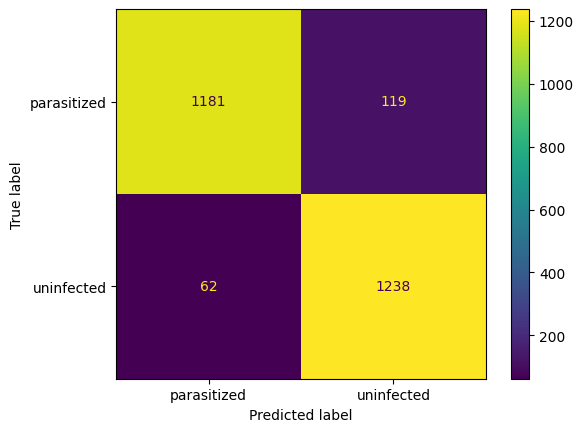

In [50]:
# classification matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_1, display_labels= names1)

Base model performance is good.  Model has high recall and precision.  Model accuracy is 0.93.  Most of the misclassifications (119 out of 181) are predicting uninfected when true is parasitized. This is the worst type of error because the malaria wouldn't be caught. These people would go untreated.  Really need to minimize this type of error.

<b>Plotting the train and validation curves

In [51]:
# convert history to dataframe
hist1_dict= history1.history
hist1_df= pd.DataFrame(data= hist1_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

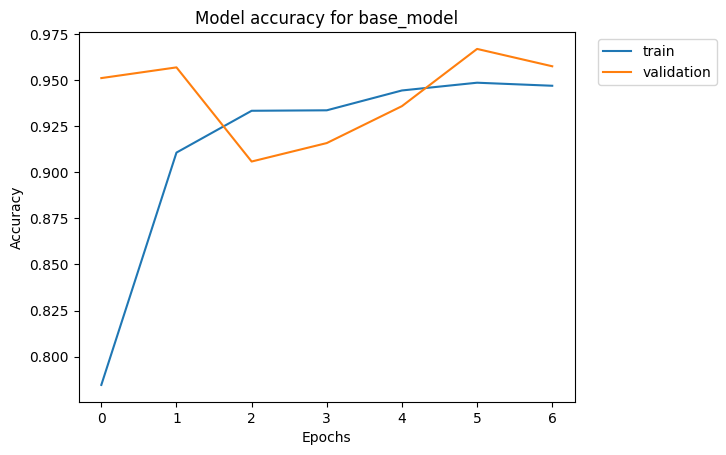

In [52]:
# make figure to compare training and validation accuracy for base_model
plt.plot(hist1_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist1_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for base_model')                                     # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

Training and validation have high accuracy.  Model seems to fit validation data well.  Model doesn't seem to be overfit.  Model is basic: only 2 CNN layers, 1 fully dense layer and 1 classification/output layer, yet has good accuracy.  Need to improve precision and recall.

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [53]:
# reset keras backend state
backend.clear_session()

In [54]:
# fix the seed for reproducibility
seed= 24
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

###<b> Building the Model

In [55]:
# CNN model 1
model_1= Sequential()


model_1.add(Conv2D(64, kernel_size= (3,3), padding= 'same', activation= 'relu', input_shape= (64, 64, 3)))      # first CNN layer


model_1.add(Conv2D(32, kernel_size= (3,3), padding= 'same', activation= 'relu'))                               # second CNN layer
model_1.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer


model_1.add(Conv2D(16, kernel_size= (3,3), padding= 'same', activation= 'relu'))                               # third CNN layer
model_1.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer
model_1.add(Dropout(0.25))                                                                                     # dropout layer

model_1.add(Conv2D(8, kernel_size= (3,3), padding= 'same', activation= 'relu'))                                # fourth CNN layer
model_1.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer



model_1.add(Flatten())                                                                                         # flatten layer
model_1.add(Dense(16, activation= 'relu'))                                                                  # dense layer
model_1.add(Dropout(0.25))                                                                                     # dropout layer
model_1.add(Dense(2, activation= 'softmax'))                                                                   # classification/output layer

In [56]:
# look at summary of model 1
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,282 (133.91 KB)

 Trainable params: 34,282 (133.91 KB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [57]:
opt2= Adam(learning_rate= 0.001)                                                        # define the optimizer
model_1.compile(optimizer= opt2, loss= 'binary_crossentropy', metrics= ['accuracy'])    # compile the model

<b> Using Callbacks

In [58]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                      # define early stopping
mc= ModelCheckpoint('best_model_1.h5', monitor= 'val_accuracy', mode= 'max', verbose= 1, save_best_only= True)    # save only best model

<b>Fit and Train the model

In [59]:
# fit the model
history2= model_1.fit(x_train, y_train_encode, batch_size= 32, validation_split= 0.2, callbacks= [es, mc], verbose= 1, epochs= 30)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6432 - loss: 0.6291
Epoch 1: val_accuracy improved from -inf to 0.96054, saving model to best_model_1.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6434 - loss: 0.6289 - val_accuracy: 0.9605 - val_loss: 0.6393
Epoch 2/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9652 - loss: 0.1796
Epoch 2: val_accuracy improved from 0.96054 to 0.98838, saving model to best_model_1.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9652 - loss: 0.1792 - val_accuracy: 0.9884 - val_loss: 0.1174
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9721 - loss: 0.0998
Epoch 3: val_accuracy did not improve from 0.98838
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9721 - loss: 0.0998 - val_accuracy: 0.9850 - val_loss: 0.0947
Epoch 4/30
620/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9755 - loss: 0.0901
Epoch 4: val_accuracy did not improve from 0.98838
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9755 - loss: 0.0901 - val_accuracy: 0.9832 - val_loss: 0.0832
Epoch 5/30
620/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9773 - loss: 0.0791
Epoch 5: val_accuracy did not improve from 0.98838
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9773 - loss: 0.0791 - val_accuracy: 0.9860 - val_loss: 0.0547
Epoch 6/30
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9763 - loss: 0.0764
Epoch 6: val_accuracy did not impro

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9770 - loss: 0.0728 - val_accuracy: 0.9910 - val_loss: 0.0463
Epoch 8/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9758 - loss: 0.0721
Epoch 8: val_accuracy did not improve from 0.99099
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9759 - loss: 0.0721 - val_accuracy: 0.9724 - val_loss: 0.1059
Epoch 9/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9794 - loss: 0.0642
Epoch 9: val_accuracy did not improve from 0.99099
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9794 - loss: 0.0642 - val_accuracy: 0.9814 - val_loss: 0.0841
Epoch 10/30
621/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9793 - loss: 0.0593
Epoch 10: val_accuracy did not improve from 0.99099
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9793 - loss: 0.0593 - val_accuracy: 0.9876 - val_loss: 0.0580
Epoch 11/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0650
Epoch 11: val_accuracy improve

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9766 - loss: 0.0650 - val_accuracy: 0.9926 - val_loss: 0.0300
Epoch 12/30
621/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9776 - loss: 0.0610
Epoch 12: val_accuracy did not improve from 0.99259
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9776 - loss: 0.0610 - val_accuracy: 0.9766 - val_loss: 0.1062
Epoch 13/30
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9790 - loss: 0.0560
Epoch 13: val_accuracy did not improve from 0.99259
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9790 - loss: 0.0560 - val_accuracy: 0.9810 - val_loss: 0.0815
Epoch 14/30
620/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9815 - loss: 0.0547
Epoch 14: val_accuracy did not improve from 0.99259
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9815 - loss: 0.0546 - val_accuracy: 0.9874 - val_loss: 0.0594
Epoch 15/30
620/624 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9800 - loss: 0.0550
Epoch 15: val_accuracy did n

###<b> Evaluating the model

In [60]:
# load weights from best model
model_1.load_weights('/content/best_model_1.h5')

In [61]:
# make predictions with model_1
pred_2= model_1.predict(x_test)

# convert prediction from one hot encode to single value
pred_2= np.argmax(pred_2, axis= 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


<b> Plotting the confusion matrix

In [62]:
# classification report
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1300
           1       0.97      1.00      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



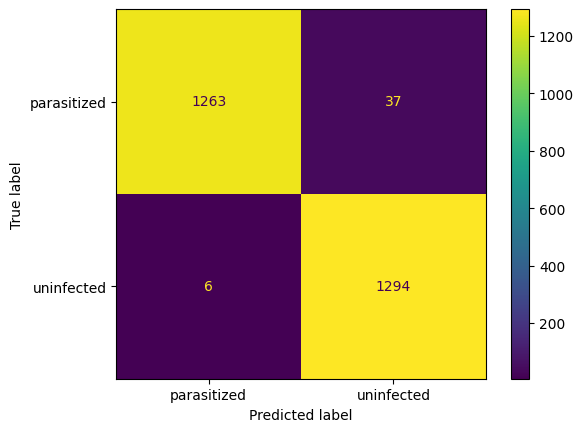

In [63]:
# classification matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_2, display_labels= names1)

Model_1 is improved over base model.  The precision and recall are higher for model_1.  The accuracy (0.98) is also higher for model_1. The number of misclassifications of parasitized as uninfected has decreased significantly (37 for model_1).  Misclassifications of parasitized as uninfected are worst error because these people wouldn't get treated for malaria.  In total there were 43 misclassifications.  Activation functions: relu and leaky relu were tried, relu gave fewer misclassifications.

<b> Plotting the train and the validation curves

In [64]:
# make the history dataframe
hist2_dict= history2.history
hist2_df= pd.DataFrame(hist2_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

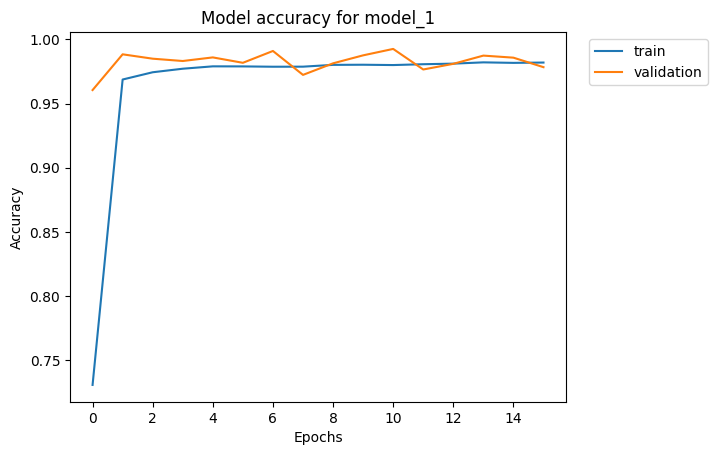

In [65]:
# make figure to compare training and validation accuracy for base_model
plt.plot(hist2_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist2_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for model_1')                                     # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

Both training and validation have high accuracy, model isn't overfit.  Model has high accuracy for validation.

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [66]:
# reset keras backend state
backend.clear_session()

In [67]:
# fix the seed for reproducibility
seed= 24
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

###<b> Building the Model

In [68]:
# CNN model 2
model_2= Sequential()

model_2.add(Conv2D(64, kernel_size= (3,3), padding= 'same', input_shape= (64, 64, 3)))      # first CNN layer
model_2.add(LeakyReLU(negative_slope= 0.1))                                                 # leaky relu layer

model_2.add(Conv2D(32, kernel_size= (3,3), padding= 'same'))                               # second CNN layer
model_2.add(LeakyReLU(negative_slope= 0.1))                                                 # leaky relu layer
model_2.add(MaxPooling2D(pool_size= (2,2)))                                                 # max pooling layer


model_2.add(Conv2D(16, kernel_size= (3,3), padding= 'same'))                               # third CNN layer
model_2.add(LeakyReLU(negative_slope= 0.1))                                                 # leaky relu layer
model_2.add(MaxPooling2D(pool_size= (2,2)))                                                 # max pooling layer
model_2.add(Dropout(0.25))                                                                  # dropout layer


model_2.add(Conv2D(8, kernel_size= (3,3), padding= 'same'))                                # fourth CNN layer
model_2.add(LeakyReLU(negative_slope= 0.1))                                                 # leaky relu layer
model_2.add(MaxPooling2D(pool_size= (2,2)))                                                 # max pooling layer
model_2.add(BatchNormalization())                                                           # Batch Normalization layer



model_2.add(Flatten())                                                                     # flatten layer
model_2.add(Dense(16))                                                                     # dense layer
model_2.add(LeakyReLU(negative_slope= 0.1))                                                 # leaky relu layer
model_2.add(Dropout(0.25))                                                                  # dropout layer
model_2.add(Dense(2, activation= 'softmax'))                                               # classification/output layer



In [69]:
# summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,314 (134.04 KB)

 Trainable params: 34,298 (133.98 KB)

 Non-trainable params: 16 (64.00 B)

###<b>Compiling the model

In [70]:
# compile the model
opt3= Adam(learning_rate= 0.001)                                                       # define the optimizer
model_2.compile(optimizer= opt3, loss= 'binary_crossentropy', metrics= ['accuracy'])

<b> Using callbacks

In [71]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                      # define early stopping
mc= ModelCheckpoint('best_model_2.h5', monitor= 'val_accuracy', mode= 'max', verbose= 1, save_best_only= True)    # save only best model

<b>Fit and train the model

In [72]:
# fit the model
history3= model_2.fit(x_train, y_train_encode, batch_size= 32, validation_split= 0.2, callbacks= [es, mc], verbose= 1, epochs= 30)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6251 - loss: 0.6614
Epoch 1: val_accuracy improved from -inf to 0.00020, saving model to best_model_2.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6252 - loss: 0.6614 - val_accuracy: 2.0032e-04 - val_loss: 1.7867
Epoch 2/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7844 - loss: 0.4337
Epoch 2: val_accuracy improved from 0.00020 to 0.99219, saving model to best_model_2.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7854 - loss: 0.4321 - val_accuracy: 0.9922 - val_loss: 0.0418
Epoch 3/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9594 - loss: 0.1193
Epoch 3: val_accuracy did not improve from 0.99219
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9595 - loss: 0.1192 - val_accuracy: 0.9840 - val_loss: 0.0654
Epoch 4/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9685 - loss: 0.0990
Epoch 4: val_accuracy did not improve from 0.99219
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9685 - loss: 0.0989 - val_accuracy: 0.9804 - val_loss: 0.0717
Epoch 5/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9709 - loss: 0.0921
Epoch 5: val_accuracy improved from 0.99219 to 0.99459, saving model to best_model_2.h5


624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9709 - loss: 0.0920 - val_accuracy: 0.9946 - val_loss: 0.0249
Epoch 6/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9729 - loss: 0.0875
Epoch 6: val_accuracy did not improve from 0.99459
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9729 - loss: 0.0875 - val_accuracy: 0.9812 - val_loss: 0.0669
Epoch 7/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9728 - loss: 0.0825
Epoch 7: val_accuracy did not improve from 0.99459
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9728 - loss: 0.0825 - val_accuracy: 0.9784 - val_loss: 0.0798
Epoch 8/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9741 - loss: 0.0780
Epoch 8: val_accuracy did not improve from 0.99459
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9741 - loss: 0.0779 - val_accuracy: 0.9918 - val_loss: 0.0319
Epoch 9/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9760 - loss: 0.0714
Epoch 9: val_accuracy did not i

<b>Plotting the train and validation accuracy

In [73]:
# make the history dataframe
hist3_dict= history3.history
hist3_df= pd.DataFrame(hist3_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

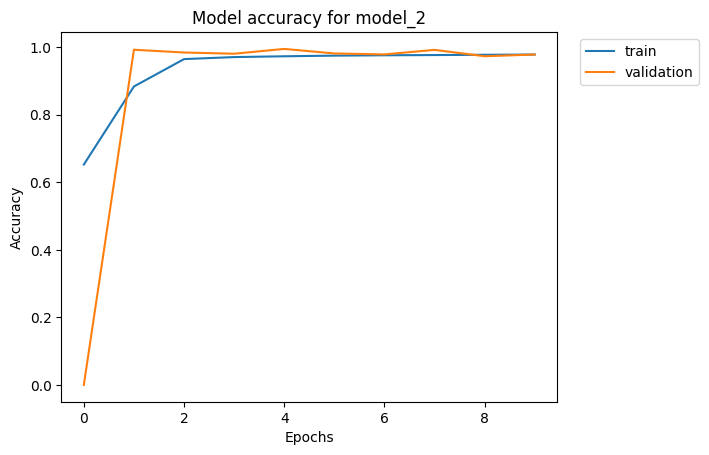

In [74]:
# make figure to compare training and validation accuracy for base_model
plt.plot(hist3_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist3_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for model_2')                                        # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

###<b>Evaluating the model

In [75]:
# load weights from best model
model_2.load_weights('/content/best_model_2.h5')


In [76]:
# make predictions with model_2
pred_3= model_2.predict(x_test)

# convert prediction from one hot encode to single value
pred_3= np.argmax(pred_3, axis= 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


<b> Generate the classification report and confusion matrix

In [77]:
# classification report
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1300
           1       0.96      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



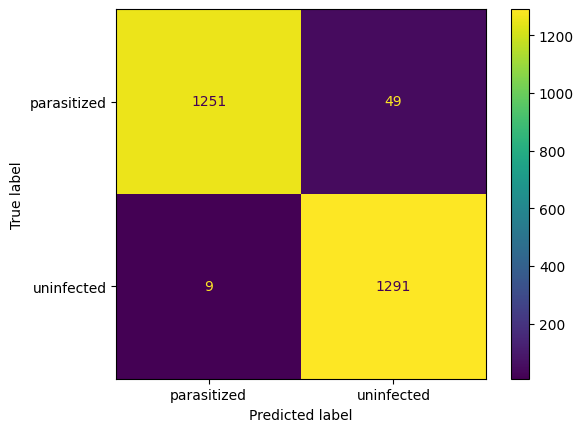

In [78]:
# classification matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_3, display_labels= names1)

####<b>Observations and insights: Model_2 has very similar architecture to model_1 except model_2 uses leaky ReLU for activation function and model_2 has batch normalization layer.  I tried different positions for the batch normalization layer, this architecture gave the highest accuracy.  Model_2 has same accuracy (0.98) as model_1.  Model_2 has in total 58 misclassifications, more misclassifications than model_1.  The uninfected cells are predicted well.  However the parasitized cells are not predicted well.  There are many misclassifications of parasitized as uninfected, this is very bad as these people wouldn't get treated for malaria.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [79]:
# separate y_train and x_train into parasitized and uninfected
# uninfected only
y_train_1= y_train[y_train == 1]
y_train_1_idx= y_train_1.index                                          # index of uninfected y_train

x_train_1= x_train[y_train_1_idx]                                     # x_train array for uninfected
x_train_1= x_train_1 * 255

#parasitized only
y_train_0= y_train[y_train == 0]
y_train_0_idx= y_train_0.index                                         # index of parasitized y_train

x_train_0= x_train[y_train_0_idx]                                     # x_train array for parasitized
x_train_0= x_train_0 * 255

print('shape of x_train_1 uninfected is: ', x_train_1.shape)
print('shape of x_train_0 parasitized is: ', x_train_0.shape)

print('shape of y_train_1 uninfected is: ', y_train_1.shape)
print('shape of y_train_0 parasitized is: ', y_train_0.shape)

x_train_list= [x_train_0, x_train_1]                                   # list with separate arrays for parasitized and uninfected


shape of x_train_1 uninfected is:  (12376, 64, 64, 3)
shape of x_train_0 parasitized is:  (12582, 64, 64, 3)
shape of y_train_1 uninfected is:  (12376,)
shape of y_train_0 parasitized is:  (12582,)


###<b> Use image data generator

In [80]:
# use ImageDataGenerator to make augmented images
new_path_1= '/content/drive/MyDrive/MIT/Capstone_project/aug_parasitized'        # folder to save augmented uninfected images
new_path_2= '/content/drive/MyDrive/MIT/Capstone_project/aug_uninfected'       # folder to save augmented parasitized images

#image date generator with rotation
datagen= ImageDataGenerator(rotation_range= 180, fill_mode= 'constant')

# loop to generate augmented images
i= 0
for i, j in enumerate(x_train_list):
  count1= 0
  # make augmented images for parasitized
  if i == 0:
    for batch in datagen.flow(j, batch_size= 10, save_to_dir= new_path_1, save_prefix= 'parasitized', save_format= '.png'):
      count1= count1 + 1
      if count1 > 4:
        break
  # make augmented images for uninfected
  else:
    for batch in datagen.flow(j, batch_size= 10, save_to_dir= new_path_2, save_prefix= 'uninfected', save_format= '.png'):
      count1= count1 + 1
      if count1 > 4:
        break

In [81]:
# processing augmented images
# read in the augmented images and make labels
x_train_aug= []                                                                  # empty list to hold augmented arrays
y_train_aug= []                                                                  # empty list to hold labels


path1= Path('//content/drive/MyDrive/MIT/Capstone_project')                      # directory to hold augmented images
folders2= ['aug_parasitized', 'aug_uninfected']                                  # folders within directory to hold each type of image
i= 0
for i in range(2):                                                               # for loop to read in images, resize and store as arrays also to store labels
  newpath1= path1 / folders2[i]
  allfiles1= newpath1.glob("*")                                                  # get all files in folder
  j= 0
  for j in allfiles1:
    img1= cv2.imread(str(j))                                                     # read files in folder
    img2= cv2.resize(img1, (64, 64))                                             # resize image
    x_train_aug.append(img2)                                                     # add array to list
    if i == 0:
      y_train_aug.append(0)                                                      # if image parasitized then add label= 0
    else:
      y_train_aug.append(1)                                                      # if image uninfected then add label= 1



In [82]:
# normalize x_train_aug, make array
x_train_aug= np.array(x_train_aug)
x_train_aug= x_train_aug/255

# convert list to series
y_train_aug= pd.Series(data= y_train_aug, name= 'Labels')

In [83]:
# check shape of x_train_aug and y_train_aug
print('shape of x_train_aug is ', x_train_aug.shape)
print('shape of y_train_aug is ', y_train_aug.shape)


shape of x_train_aug is  (100, 64, 64, 3)
shape of y_train_aug is  (100,)


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

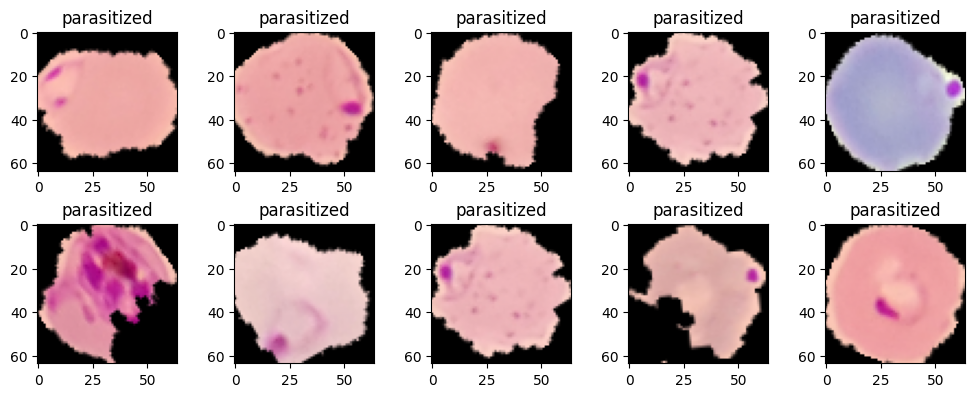

In [84]:
# look at 10 images
randomlist3= np.random.randint(0, 50, size= 10)                                 # make random list of images

count3= 0                                                                       # counter
# make figure with 10 images
fig30, ax30= plt.subplots(2, 5, figsize= (10, 4))                               # define subplots
fig30.tight_layout()                                                            # use tight layout
i= 0
for i in range(2):                                                              # loop for number of rows
  j= 0
  for j in range(5):                                                            # loop for number of columns
    ax30[i, j].imshow(x_train_aug[randomlist3[count3]])                          # plot the images
    if y_train_aug[randomlist3[count3]] == 0:                                    # check the label
      title30= 'parasitized'
    else:
      title30= 'uninfected'
    count3= count3 + 1                                                          # update the counter
    ax30[i, j].set_title(title30)                                                # update title with label

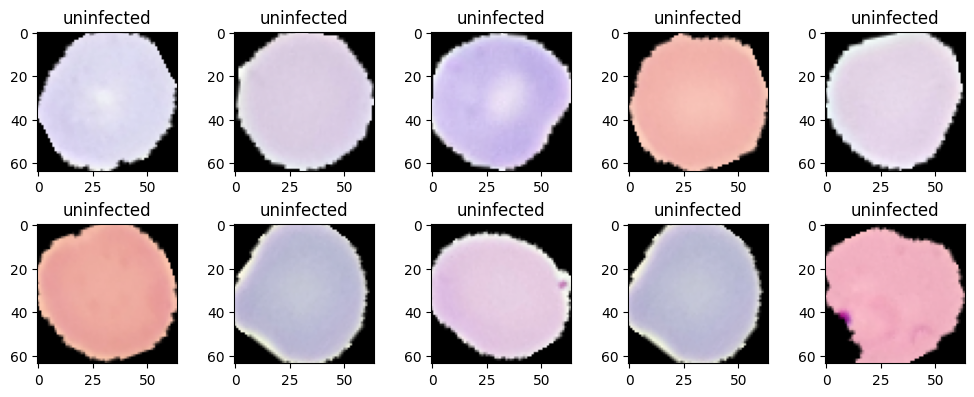

In [85]:
# look at 10 images
randomlist4= np.random.randint(51, 100, size= 10)                             # make random list of images

count4= 0                                                                      # counter
# make figure with 10 images
fig31, ax31= plt.subplots(2, 5, figsize= (10, 4))                               # define figure subplots
fig31.tight_layout()                                                            # use tight layout
i= 0
for i in range(2):                                                              # loop for number of rows
  j= 0
  for j in range(5):                                                             # loop for number of columns
    ax31[i, j].imshow(x_train_aug[randomlist4[count4]])                          # plot the images
    if y_train_aug[randomlist4[count4]] == 0:                                    # check the label
      title31= 'parasitized'
    else:
      title31= 'uninfected'
    count4= count4 + 1                                                         # update the counter
    ax31[i, j].set_title(title31)                                                # update title with label

####<b>Observations and insights: ImageDataGenerator was used to generate augmented images.  6000 augmented infected images and 6000 augmented parasitized images were generated.  ImageDataGenerator augmented: rotation, zoom, brightness and shear.

In [86]:
# make the image data generator pull from training directory
train_dir= '/content/cell_images/train'                                          # training directory containing folders: parasitized and uninfected
batch1= 100                                                                      # batch size
# make the training generator
datagen_train= ImageDataGenerator(rescale= 1.0/255, validation_split= 0.2, rotation_range= 180, fill_mode= 'constant')
generator_train= datagen_train.flow_from_directory(train_dir, seed= 24, target_size= (64, 64), batch_size= batch1, subset= 'training')

# make the validation generator
datagen_val= ImageDataGenerator(rescale= 1.0/255, validation_split= 0.2)
generator_val= datagen_val.flow_from_directory(train_dir, seed= 24, target_size= (64, 64), batch_size= batch1, subset= 'validation')





Found 19967 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


###<b>Building the Model

In [87]:
# reset keras backend state
backend.clear_session()

In [88]:
# fix the seed for reproducibility
seed= 24
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [89]:
# same architecture as model_1 but renamed model_aug
# same layers as model 1 just renamed
model_aug= Sequential()


model_aug.add(Conv2D(64, kernel_size= (3,3), padding= 'same', activation= 'relu', input_shape= (64, 64, 3)))      # first CNN layer


model_aug.add(Conv2D(32, kernel_size= (3,3), padding= 'same', activation= 'relu'))                               # second CNN layer
model_aug.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer


model_aug.add(Conv2D(16, kernel_size= (3,3), padding= 'same', activation= 'relu'))                               # third CNN layer
model_aug.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer
model_aug.add(Dropout(0.25))                                                                                     # dropout layer

model_aug.add(Conv2D(8, kernel_size= (3,3), padding= 'same', activation= 'relu'))                                # fourth CNN layer
model_aug.add(MaxPooling2D(pool_size= (2,2)))                                                                    # max pooling layer



model_aug.add(Flatten())                                                                                         # flatten layer
model_aug.add(Dense(16, activation= 'relu'))                                                                     # dense layer
model_aug.add(Dropout(0.25))                                                                                     # dropout layer
model_aug.add(Dense(2, activation= 'softmax'))                                                                   # classification/output layer

In [90]:
# model_aug summary
model_aug.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,282 (133.91 KB)

 Trainable params: 34,282 (133.91 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# compile the model
opt4= Adam(learning_rate= 0.001)                                                        # define the optimizer
model_aug.compile(optimizer= opt4, loss= 'binary_crossentropy', metrics= ['accuracy'])

<b>Using Callbacks

In [92]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                      # define early stopping
mc= ModelCheckpoint('best_model_aug.h5', monitor= 'val_accuracy', mode= 'max', verbose= 1, save_best_only= True)    # save only best model

<b> Fit and Train the model

In [93]:
# fit the model
history4= model_aug.fit(generator_train, steps_per_epoch= 199, epochs= 30, validation_data= generator_val, validation_steps= 50, callbacks= [es, mc], verbose= 1)

Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5378 - loss: 0.6855
Epoch 1: val_accuracy improved from -inf to 0.83250, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 50s 218ms/step - accuracy: 0.5381 - loss: 0.6854 - val_accuracy: 0.8325 - val_loss: 0.5705
Epoch 2/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6700 - loss: 0.5798
Epoch 2: val_accuracy did not improve from 0.83250
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6700 - loss: 0.5798 - val_accuracy: 0.7962 - val_loss: 0.5819
Epoch 3/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.8132 - loss: 0.4652
Epoch 3: val_accuracy improved from 0.83250 to 0.96353, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.8135 - loss: 0.4646 - val_accuracy: 0.9635 - val_loss: 0.1464
Epoch 4/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9500 - loss: 0.1668
Epoch 4: val_accuracy did not improve from 0.96353
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9500 - loss: 0.1668 - val_accuracy: 0.9629 - val_loss: 0.1571
Epoch 5/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9632 - loss: 0.1701
Epoch 5: val_accuracy improved from 0.96353 to 0.97375, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 188ms/step - accuracy: 0.9632 - loss: 0.1701 - val_accuracy: 0.9738 - val_loss: 0.1218
Epoch 6/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9700 - loss: 0.1687
Epoch 6: val_accuracy improved from 0.97375 to 0.97516, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9700 - loss: 0.1687 - val_accuracy: 0.9752 - val_loss: 0.1214
Epoch 7/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9725 - loss: 0.1400
Epoch 7: val_accuracy did not improve from 0.97516
199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - accuracy: 0.9725 - loss: 0.1400 - val_accuracy: 0.9734 - val_loss: 0.1063
Epoch 8/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9800 - loss: 0.1090
Epoch 8: val_accuracy did not improve from 0.97516
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9800 - loss: 0.1090 - val_accuracy: 0.9744 - val_loss: 0.1014
Epoch 9/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9728 - loss: 0.1338
Epoch 9: val_accuracy improved from 0.97516 to 0.97716, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.9728 - loss: 0.1338 - val_accuracy: 0.9772 - val_loss: 0.0921
Epoch 10/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 1.0000 - loss: 0.0756
Epoch 10: val_accuracy improved from 0.97716 to 0.97756, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 1.0000 - loss: 0.0756 - val_accuracy: 0.9776 - val_loss: 0.0920
Epoch 11/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9758 - loss: 0.1217
Epoch 11: val_accuracy did not improve from 0.97756
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.9758 - loss: 0.1217 - val_accuracy: 0.9732 - val_loss: 0.1102
Epoch 12/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9500 - loss: 0.1732
Epoch 12: val_accuracy did not improve from 0.97756
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9500 - loss: 0.1732 - val_accuracy: 0.9734 - val_loss: 0.1113
Epoch 13/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9741 - loss: 0.1132
Epoch 13: val_accuracy did not improve from 0.97756
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.9741 - loss: 0.1131 - val_accuracy: 0.9776 - val_loss: 0.0847
Epoch 14/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9800 - loss: 0.1123
Epoch 14: val_

199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9800 - loss: 0.1123 - val_accuracy: 0.9778 - val_loss: 0.0852
Epoch 15/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9762 - loss: 0.1061
Epoch 15: val_accuracy improved from 0.97776 to 0.97836, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.9762 - loss: 0.1061 - val_accuracy: 0.9784 - val_loss: 0.0795
Epoch 16/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9900 - loss: 0.0720
Epoch 16: val_accuracy did not improve from 0.97836
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9900 - loss: 0.0720 - val_accuracy: 0.9782 - val_loss: 0.0763
Epoch 17/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9785 - loss: 0.0965
Epoch 17: val_accuracy improved from 0.97836 to 0.98057, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.9785 - loss: 0.0965 - val_accuracy: 0.9806 - val_loss: 0.0733
Epoch 18/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9800 - loss: 0.0994
Epoch 18: val_accuracy improved from 0.98057 to 0.98137, saving model to best_model_aug.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9800 - loss: 0.0994 - val_accuracy: 0.9814 - val_loss: 0.0726
Epoch 19/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9775 - loss: 0.0979
Epoch 19: val_accuracy did not improve from 0.98137
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.9775 - loss: 0.0979 - val_accuracy: 0.9782 - val_loss: 0.0671
Epoch 20/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9700 - loss: 0.1044
Epoch 20: val_accuracy did not improve from 0.98137
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9700 - loss: 0.1044 - val_accuracy: 0.9776 - val_loss: 0.0671
Epoch 21/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9791 - loss: 0.0874
Epoch 21: val_accuracy did not improve from 0.98137
199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - accuracy: 0.9791 - loss: 0.0874 - val_accuracy: 0.9788 - val_loss: 0.0630
Epoch 22/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 1.0000 - loss: 0.0464
Epoch 22: val_

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [94]:
# confirm the class labels from imagedatagenerator
print(generator_train.class_indices)


{'parasitized': 0, 'uninfected': 1}


In [95]:
# make the history dataframe
hist4_dict= history4.history
hist4_df= pd.DataFrame(hist4_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

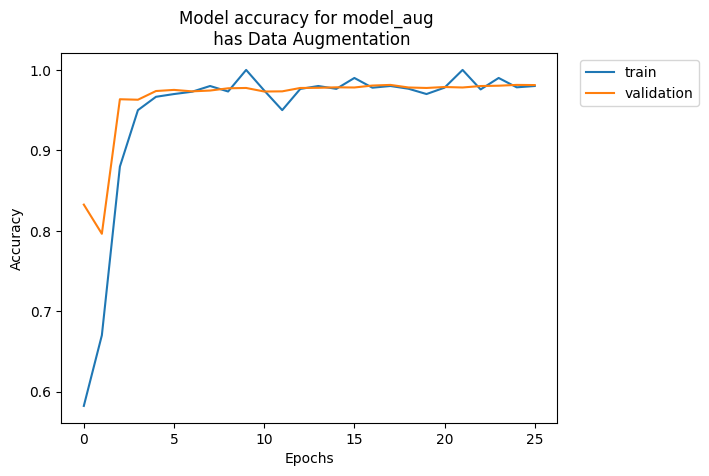

In [96]:
# make figure to compare training and validation accuracy for base_model
plt.plot(hist4_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist4_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for model_aug \n has Data Augmentation')              # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

<B>Plotting the classification report and confusion matrix

In [97]:
# load weights from best model
model_aug.load_weights('/content/best_model_aug.h5')

In [98]:
# make predictions with model_aug
pred_4= model_aug.predict(x_test)

# convert prediction from one hot encode to single value
pred_4= np.argmax(pred_4, axis= 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [99]:
# classification report
print(classification_report(y_test, pred_4))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



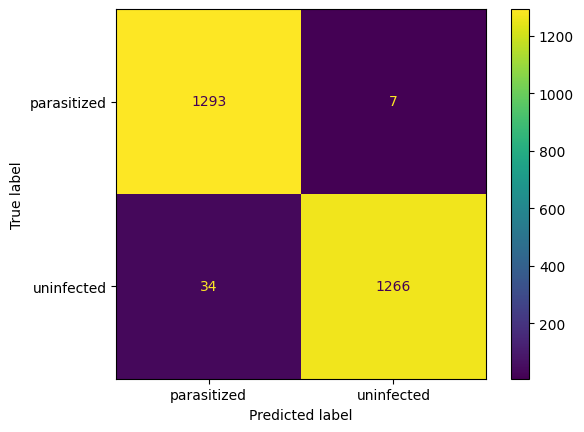

In [100]:
# classification matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_4, display_labels= names1)

**Observations:**  This model has the same architecture as model_1, model_1 had the same accuracy as model_2.  Model_1 had the fewest misclassifications.  This model with augmented images has the same accuracy as model_1 and model_2.  The specific data augmentation was rotation_range= 180.  This model had fewest misclassifications: 41.  Most misclassifications were of uninfected cells as parasitized.  Only 7 misclassifications of parasitized as uninfected, this is much lower than any other model.  Other data augmentations were attempted: combinations of rotation range with zoom range, width shift range, height shift range, brightness range, zoom range and vertical flip.  Combinations of data augmentations gave lower accuracy than just rotation range= 180.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [101]:
# reset keras backend state
backend.clear_session()

In [102]:
# fix the seed for reproducibility
seed= 24
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [103]:
# make the vgg layers
vgg= VGG16(input_shape= (224, 224, 3), weights= 'imagenet', include_top= False)

# dont train the vgg layers
for layer in vgg.layers:
  layer.trainable= False

# make the model
vgg_model= Sequential()                                                         # make sequential model

vgg_model.add(vgg)                                                              # add vgg layers

vgg_model.add(Flatten())                                                        # flatten CNN

vgg_model.add(Dense(2, activation= 'softmax'))                                  # add classification/output layer

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [104]:
# look at the model summary
vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

###<b>Compiling the model

In [105]:
# make the optimizer
opt5= Adam(learning_rate= 0.001)

# compile the model
vgg_model.compile(optimizer= opt5, loss= 'binary_crossentropy', metrics= ['accuracy'])

<b> using callbacks

In [106]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                        # define early stopping
mc= ModelCheckpoint('best_model_vgg.h5', monitor= 'val_accuracy', mode= 'max', verbose= 1, save_best_only= True)    # save only best model

<b>Fit and Train the model

In [107]:
# setup image data generator
train_dir= '/content/cell_images/train'                                           # training image directory
batch1= 100                                                                       # batch size
# make the training generator
datagen_train2= ImageDataGenerator(preprocessing_function= preprocess_input, rotation_range= 180, validation_split= 0.2)
generator_train2= datagen_train2.flow_from_directory(train_dir, seed= 24, target_size= (224, 224), batch_size= batch1, subset= 'training')

# make the validation generator
datagen_val2= ImageDataGenerator(preprocessing_function= preprocess_input, validation_split= 0.2)
generator_val2= datagen_val2.flow_from_directory(train_dir, seed= 24, target_size= (224, 224), batch_size= batch1, subset= 'validation')



Found 19967 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [108]:
history5= vgg_model.fit(generator_train2, steps_per_epoch= 199, epochs= 30, validation_data= generator_val2, validation_steps= 50, callbacks= [es, mc], verbose= 1)

Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8677 - loss: 1.6860
Epoch 1: val_accuracy improved from -inf to 0.94931, saving model to best_model_vgg.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.8681 - loss: 1.6813 - val_accuracy: 0.9493 - val_loss: 0.4141
Epoch 2/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:34 480ms/step - accuracy: 0.9800 - loss: 0.1986
Epoch 2: val_accuracy improved from 0.94931 to 0.95071, saving model to best_model_vgg.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9800 - loss: 0.1986 - val_accuracy: 0.9507 - val_loss: 0.4433
Epoch 3/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9582 - loss: 0.3916
Epoch 3: val_accuracy improved from 0.95071 to 0.95532, saving model to best_model_vgg.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9582 - loss: 0.3916 - val_accuracy: 0.9553 - val_loss: 0.4433
Epoch 4/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:40 507ms/step - accuracy: 0.9500 - loss: 0.4555
Epoch 4: val_accuracy did not improve from 0.95532
199/199 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9500 - loss: 0.4555 - val_accuracy: 0.9547 - val_loss: 0.3785
Epoch 5/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9572 - loss: 0.4591
Epoch 5: val_accuracy improved from 0.95532 to 0.95973, saving model to best_model_vgg.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9573 - loss: 0.4591 - val_accuracy: 0.9597 - val_loss: 0.4741
Epoch 6/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:38 498ms/step - accuracy: 0.9700 - loss: 0.4730
Epoch 6: val_accuracy improved from 0.95973 to 0.96213, saving model to best_model_vgg.h5


199/199 ━━━━━━━━━━━━━━━━━━━━ 26s 129ms/step - accuracy: 0.9700 - loss: 0.4730 - val_accuracy: 0.9621 - val_loss: 0.4062
Epoch 7/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9618 - loss: 0.4585
Epoch 7: val_accuracy did not improve from 0.96213
199/199 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9618 - loss: 0.4587 - val_accuracy: 0.9589 - val_loss: 0.6043
Epoch 8/30
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:39 502ms/step - accuracy: 0.9600 - loss: 0.1691
Epoch 8: val_accuracy did not improve from 0.96213
199/199 ━━━━━━━━━━━━━━━━━━━━ 26s 129ms/step - accuracy: 0.9600 - loss: 0.1691 - val_accuracy: 0.9489 - val_loss: 0.8499
Epoch 9/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9615 - loss: 0.5300
Epoch 9: val_accuracy did not improve from 0.96213
199/199 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9615 - loss: 0.5300 - val_accuracy: 0.9403 - val_loss: 0.6304
Epoch 9: early stopping


<b>Plot the train and validation accuracy

In [109]:
print(generator_train2.class_indices)

{'parasitized': 0, 'uninfected': 1}


In [110]:
hist5_dict= history5.history
hist5_df= pd.DataFrame(data= hist5_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

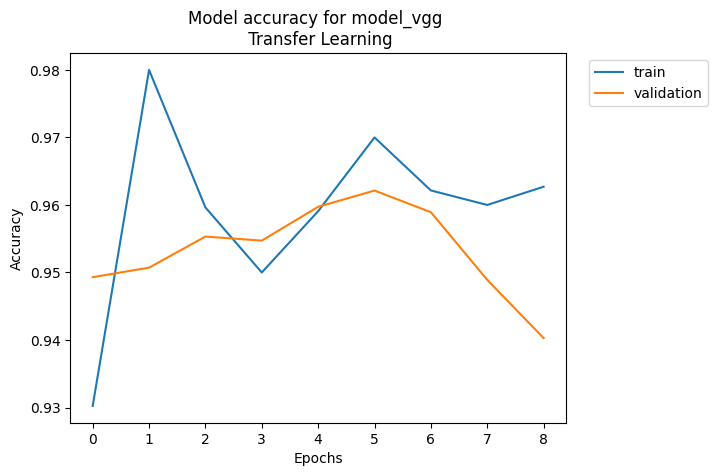

In [111]:
# make figure to compare training and validation accuracy for base_model
plt.plot(hist5_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist5_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for model_vgg \n Transfer Learning')              # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

###**Observations and insights: Both the training and validation accuracies are high, meaning the model isn't overfit.  Initially model has high validation accuracy, however validation accuracy doesn't improve much in further epochs.**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [112]:
# load weights from best model
vgg_model.load_weights('/content/best_model_vgg.h5')

In [113]:
# resize x_test images and save to list
# create labels (y_test)

test_dir= "/content/cell_images/test"                 # filepath to test folder


x_test2= []                                             # list to hold test images
y_test2= []                                             # list to hold test labels

# for loop to store images in x_test and labels in y_test
i= 0
for i in folders:
  newpath2= Path(test_dir) / i                          # combined filepath of test directory and folder: parasitized or uninfected
  files2= newpath2.glob('*')                              # get all files within filepath
  j= 0
  for j in files2:
    img3= cv2.imread(str(j))                            # read in image from folder
    img4= cv2.resize(img3, (224, 224))                  # resize image to 64 x 64 (matches training image size)
    x_test2.append(img4)                                # add resized image to list

    if i == folders[0]:                                 # if parasitized y_test label= 0
      y_test2.append(0)
    else:                                               # if uninfected y_test label= 1
      y_test2.append(1)

In [114]:
x_test2= np.array(x_test2)

y_test2= pd.Series(data= y_test2, name= 'Labels')


In [115]:
# make predictions
pred_5= vgg_model.predict(x_test2)

# convert from one hot encode to single value
pred_5= np.argmax(pred_5, axis= 1)


82/82 ━━━━━━━━━━━━━━━━━━━━ 33s 240ms/step


<b>Plotting the classification report and confusion matrix

In [116]:
# classification report
print(classification_report(y_test2, pred_5))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1300
           1       0.98      0.93      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



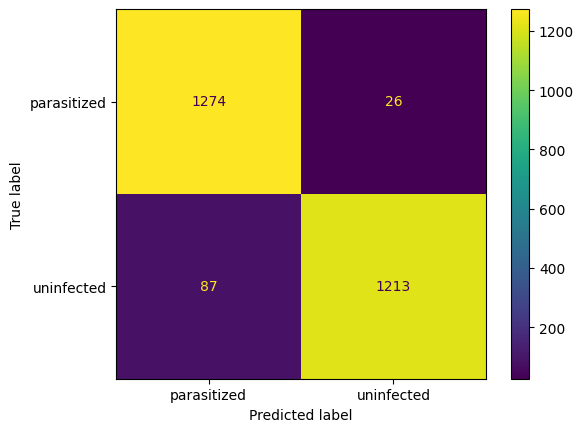

In [117]:
# classification matrix
ConfusionMatrixDisplay.from_predictions(y_test2, pred_5, display_labels= names1)

**Observations: Transfer learning model with vgg16 has high accuracy: 0.96.  This model was used with all CNN layers frozen and weights from imagenet.  The training data had the same data augmentations as the previous model (rotation range= 180).  The data augmentation model without transfer learning had better performance then the model that used transfer learning from vgg16.**

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: The model with best performance was data augmentation model (Model 3 with Data Augmentation).  3 models had accuracy= 0.98: model_1, model_2 with batch normalization and model_3 with data augmentation. Data augmentation model had the fewest misclassifications of parasitized as uninfected, which is the most severe error.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

In [118]:
# classification reports
print('Base_Model classification report')
print(classification_report(y_test, pred_1))
print("-" * 100)
print('Model_1 classification report')
print(classification_report(y_test, pred_2))
print("-" * 100)
print('Model_2 classification report')
print(classification_report(y_test, pred_3))
print("-" * 100)
print('Data augmentation model (model_aug) classification report')
print(classification_report(y_test, pred_4))
print("-"  *100)
print('Transfer learning model (vgg_model) classification report')
print(classification_report(y_test, pred_5))

Base_Model classification report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1300
           1       0.91      0.95      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600

----------------------------------------------------------------------------------------------------
Model_1 classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1300
           1       0.97      1.00      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

----------------------------------------------------------------------------------------------------
Model_2 classification report
              precision    recall  f1-score   suppo

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The parasitized red blood cells have at least 1 darker spot.  The model needs to be able to recognize the darker spot.

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

All of the classification reports for the 5 models are printed above.  Models had different architectures: different number of layers, different activation functions, some had data augmentation and 1 had transfer learning with vgg16. 3 models had accuracy= 0.98: model_1, model_2 with batch normalization and model 3 with data augmentation.  Data augmentation model had the fewest misclassifications of parasitized as uninfected, which is a very severe error.  It is most important to minimize the number of parasitized misclassified as uninfected.

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

I propose model_aug be adopted, this was the model 3 with data augmentation.  This model had very high accuracy (0.98).  2 other models also had the same accuracy: model_1 and model 2 with batch normalization.  Additionally model_aug had the fewest misclassifications of parasitized as uninfected, this error is the most important to minimize.  If the parasitized cells are misclassified as uninfected then the patient will not be treated for malaria.